# Lesson 1 - Introduction to Artificial Neural Networks

This lesson will focus on the history of the challenges that researchers in the field on Artificial Neural Networks (ANNs) have met and solved.
The course attendants will understand the foundations on which ANNs have been (and currently are) developed and will thus better appreciate the majority of state-of-the-art solutions.

### Summary

* [Lexicon](#lexicon)
* [Parametric learning](#parametric_learning)
* [1943: Linear Threshold Unit](#ltu)
* [1949: Hebbian learning](#hebb)
* [1957: Perceptron algorithm](#perceptron)
* [1960: Delta rule](#delta_rule)
* [1989: Universal Approximation Theorem](#uat)
* [1986: Backpropagation algorithm](#backprop)


<a id=lexicon></a>
### Lexicon

In order to allow an easy translation from a *classical* statistical framework to the modern *statistical learning* framework, this notebook provides a brief vocabulary which will be used throughout the course.

The usual statistical inference problem is framed as a search for a mapping

$$f: X \to Y$$

where $X$ is a set representing what we can observe in the reality, while $Y$ represents what we would like to know about the reality, and that we suppose related to what we observe.

To put it simply:
* $X$ represents **what we know**
* $Y$ represents **what we want to know**

$X$ is usually a real vector space which coordinates quantify the relevant and quantifiable properties of the problem's domain.

$Y$ is usually a low-dimensional real vector space (for continuous regression) or a finite set (for logistic regression, AKA classification).

The points in $X$ are usually modeled as random vectors $x = (x_1, x_2, \dots x_n) \in \mathbb{R}^n$ whose components are called *independent variables*, *observables* or *predictors* in classical statistics and **inputs** in statistical learning.

The points in $Y$ are usually modeled as random vectors $y = (y_1, y_2, \dots y_m) \in \mathbb{R}^m$ or by a discrete random variable $y \in {Y_1, Y_2, \dots Y_C}$ which components are called *dependent variables*, *targets* or *responses* in classical statistics and **outputs** in statistical learning.

Many classical statistics techniques do not infer $y$ as a direct response to $x$

$$y = f(x)$$

but rather on a preliminary transformation of $x$:

$$y = f(\phi(x))$$

The transformed points $\phi(x)$ are called *latent variables* or *transformed variables* in classical statistics and **features** in statistical learning, while the map $\phi$ is called a **feature map**.


<a id=parametric_learning></a>
### Parametric learning

Suppose we observe a set $E = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots (x^{(N)}, y^{(N)})\} \subset X \times Y$; we call this observations **experience**.

We would like to have a function $f: X \to Y$ that satisfies the observed pairs, but that could also be applied confidently to unseen instances $x \in X$; this last capability to extend $f$ to unseen examples is called **generalization**.

When $Y$ is continuous, both univariate and multivariate, this statistical inference task is referred to as **regression**.
If the seeked releationship $f \subset X \times Y$ is linear (i.e. $y_j = \sum_{i=1}^{n} w_{ji} x_i$) we talk about **linear regression**, otherwise the task is called **non-linear regression**.

When $Y$ is a finite set, the problem is called **classification**.
With a slight abuse, we will refer to classification as **logistic regression**, and in particular we will talk about **binomial logistic regression** when $|Y| = 2$ and of **multinomial logistic regression** when $|Y| = k, k > 2$.

A brief note about the etimology of the terms.
The term *regression* was coined in the 19th century by the English statistician Francis Galton to refer to the phenomenon of *regression towards mediocrity in hereditary stature*, an 1886 study in which he extensively used line fitting techniques, but where the term *regression* indicated more an outcome of the analysis than the techniques themselves!
The term *logistic* was introduced in 1844 by the Belgian statistician Pierre Verhulst in his work *Reserches mathematiques sur la loi d'accroisement de la population*, polemicizing against the exponential models for a population's growth that relied on the unreasonable assumption of unlimited resources; he defined more logical hypothesis and produced growth plot with a sigmoid shape, a function that he named *logistic* because it was the result of a model which used *logical* assumptions.
How was this term transferred to the classification problem? As we will see, this *logistic function* will play a critical role for Artificial Neural Networks in general, and for classification tasks in particular.

The general problem of **machine learning** is a particular case of the more general statistical learning framework, since all the experience available to an agent is in the form of digital data.

Classical statistical inference defines the concept of a *parametric model*, a space of functions

$$\mathcal{F}_{\Theta} = \{f_{\theta}: X \to Y\}_{\theta \in \Theta}$$

parametrized by elements of $\Theta$, into which the closest (in a metric spaces sense) approximation $f_{\theta^*}$ to the real map $f: X \to Y$ is searched for by whatever statistical procedure the investigator prefers.
Since machine learning is a subfield of Artificial Intelligence, in this context models are also called **agents**.

Statistical learning defines the concept of a **risk functional** (also called **loss functional** or **cost functional**)

$$L: \mathcal{F}_{\Theta} \to \mathbb{R}$$

that can evaluate models of the chosen family. This concept is critical, since it allows to *translate* the analytical procedure of functional minimization into a *navigation* of the parameter space $\{\theta_0, \theta_1, \dots \theta^*\} \subset \Theta$ intended to find an optimal solution $\theta^*$.
This process of iteratively *modifying the agent's parameters to minimize the risk functional* is called **learning**.

<img src='figures/function_approximation.png', width=480, height=480>


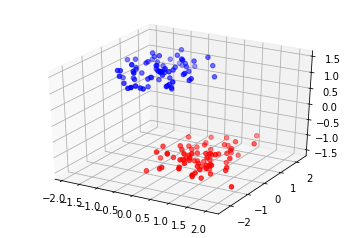

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale

# create dataset
X, Y_hat = make_blobs(n_samples=150, n_features=3, centers=2)
X = scale(X)
Y_hat = 2*Y_hat - 1.0

# plot data
fig1 = plt.figure()
ax = fig1.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y_hat, cmap='bwr')
plt.show()


<a id=ltu></a>
### 1943: Linear Threshold Unit

Idea: the original [paper](https://pdfs.semanticscholar.org/5272/8a99829792c3272043842455f3a110e841b1.pdf) by McCulloch and Pitts essentially stated that **a threshold neuron with binary output implementing a weighted sum of inputs can emulate first-order logic sentences (NOT/AND/OR functions)**.
This ensures that first-order logic statements as *"this point belongs/does not belong to a set"* can be computed by setting suitable thresholds on a linear combination of values.

Let

$$x = (x_1, x_2, \dots x_n) \in \mathbb{R}^n$$

be an input vector.
A **Linear Threshold Unit (LTU)** models the following:

$$LTU(x) = \begin{cases} 1, & \mbox{if } \sum_{i=1}^{n} w_i x_i \geq b \\ -1, & \mbox{if } \sum_{i=1}^{n} w_i x_i < b \end{cases}$$

where $b$ is a specified *firing threshold* (or simply *threshold*) that specifies the amount of *stress* to be accumulated in the neuron under the form of a linear combination of stimuli before the neuron can *fire* a non-zero signal.
Improperly, this function is often referred to as a *Heaviside-activated linear unit*, but the Heaviside function is defined as

$$H(t) = \begin{cases} 0, & \mbox{if } t < 0 \\ \frac{1}{2}, & \mbox{if } t = 0 \\ 1, & \mbox{if } t > 0 \end{cases}$$

<img src='figures/linear_threshold_unit.png', width=480, height=480>

Mathematically, a LTU is able to draw an hyperplane in $\mathbb{R}^n$, as shown by the example below.


In [2]:
class LTU():
    def __init__(self, n_dim):
        # init LTU
        self.weights = np.random.randn(n_dim)
        self.bias = np.random.randn()
    
    def linear(self, x):
        return np.dot(x, self.weights) + self.bias
    
    def activate(self, linear):
        return np.where(linear >= 0, 1, -1)
    
    def predict(self, x):
        return self.activate(self.linear(x))
    

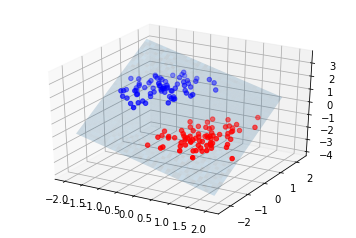

In [3]:
ltu = LTU(X.shape[1])

# generate a meshgrid to compute LTU hyperplane
x = np.arange(-2.0, 2.0, 0.1)
y = np.arange(-2.0, 2.0, 0.1)
xx, yy = np.meshgrid(x, y)

# plot LTU hyperplane onto data
fig2 = plt.figure()
ax21 = fig2.gca(projection='3d')
ax21.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y_hat, cmap='bwr')
zz_ltu = -(np.dot(np.transpose(np.vstack([xx[None, :], yy[None, :]]), (1, 2, 0)), ltu.weights[:-1]) + ltu.bias) / ltu.weights[-1]
ax22 = fig2.gca()
ax22.plot_surface(xx, yy, zz_ltu, alpha=0.2)
plt.show()


Problem: the threshold of the MPC neuron needs to be set by hand.

<a id=hebb></a>
### 1949: Hebbian learning

Idea: in his [book](http://s-f-walker.org.uk/pubsebooks/pdfs/The_Organization_of_Behavior-Donald_O._Hebb.pdf) on neuropsychology, on the basis of experimental observations, Hebb stated that **"when the axon of a cell A is near enough to excite a cell B and repeatedly or persistently takes part in firing it, some growth process or metabolic change takes place in one or both cells such that A’s efficiency, as one of the cells firing B, is increased."**
The main implication of this statement is that connected neurons should exhibit a self-organization property in order to optimize their communication process.

To shape this idea into the mathematical terms of a LTU, Hebb's goal is to find a constant $\xi > 1$ such that

$$\langle x, w \rangle = y = \langle \frac{x}{\xi}, w + \Delta w \rangle$$

That is, to change the strengths $w$ of the connections in such a way that, after the *metabolic change*, the same activation $y$ can be obtained with an *attenuated version* $\frac{x}{\xi}$ of the inputs.
A simple way to do this is aligning or counteraligning the weights with the input pattern $x$

$$\Delta w = \alpha y x$$

where $\alpha$ is a small positive constant called **learning rate**, which guarantees

$$\xi = 1 + \eta \|x\|^2$$

as desired.


Problem: Hebb did not provide a formal procedure to train an LTU neuron automatically.

<a id=perceptron></a>
### 1957: Perceptron algorithm

Idea: Frank Rosenblatt was the first to realize a working Hebbian model based on a LTU neuron.
The basic representation is This *adaptive artificial neuron*, that was capable of learning autonomously, was called [perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf).

The training algorithm proposed by Rosenblatt iteratively presents patterns $x^{(i)}$ to the LTU, which predicts $LTU(x^{(i)}) = y^{(i)} \in \{-1, 1\}$, but hides the known desired target $\hat{y}^{(i)}$ from it; after each presented pattern, the difference $\delta y^{(i)} = \hat{y}^{(i)} - y^{(i)}$ determines wether the LTU response should have been higher or lower; this **error signal** is finally used to determine which connections to inhibit ($|w + \Delta w| < |w|$) and which to excite ($|w + \Delta w| > |w|$):

$$\Delta w = \alpha \delta y^{(i)} x^{(i)}$$

The main difference with the Hebbian learning rule is that the perceptron learning is actually *anti-Hebbian* in that it tries to force the LTU to close the existing gap with a known pattern (**supervised learning**), while Hebbian learning creates a self-stimulating loop (the goal is the reduction of the intensity of the input).

The perceptron algorithm can also handle **multivariate logistic regression**: supposing we want to predict $\hat{y} = (\hat{y}_1, \hat{y}_2)$, we could use two distinct (and not mutually interconnected) perceptrons $LTU_1(x) = y_1$ and $LTU_2(x) = y_2$ to model the two components of the output.
This ensemble of units is a first example of a **layer** of artificial neurons, which is a foundamental concept for modern Artificial Neural Networks research.

<img src='figures/perceptron_learning.png', width=480, height=480>


In [4]:
class Perceptron(LTU):
    def __init__(self, n_dim, alpha=0.001, n_epochs=10):
        LTU.__init__(self, n_dim)
        self.bias = 0
        self.alpha = alpha
        self.n_epochs = n_epochs
        # record "heatmaps" of updates
        self.heatmaps = list()
        
    def train_one_step(self, x, y_hat):
        y = self.predict(x)
        delta = y_hat - y
        delta_w = self.alpha * delta * x
        delta_b = self.alpha * delta
        self.weights += delta_w
        self.bias += delta_b
        # store "heatmap" of current update
        self.heatmaps.append(np.array([x, delta_w]))
        
    def train(self, X, Y_hat):
        for i_epoch in range(self.n_epochs):
            for (x, y_hat) in zip(X, Y_hat):
                self.train_one_step(x, y_hat)
            print('Epoch {:2d} - Accuracy: {:6.2f}%'.format(i_epoch+1, self.accuracy(X, Y_hat)))
            
    def accuracy(self, X, Y_hat):
        Y = self.predict(X)
        accuracy = 100 * (np.sum(np.where(Y==Y_hat, 1, 0)) / len(Y))
        return accuracy
    

Epoch  1 - Accuracy:  46.67%
Epoch  2 - Accuracy:  61.33%
Epoch  3 - Accuracy:  70.00%
Epoch  4 - Accuracy:  74.67%
Epoch  5 - Accuracy:  79.33%
Epoch  6 - Accuracy:  82.00%
Epoch  7 - Accuracy:  85.33%
Epoch  8 - Accuracy:  88.00%
Epoch  9 - Accuracy:  88.00%
Epoch 10 - Accuracy:  90.67%


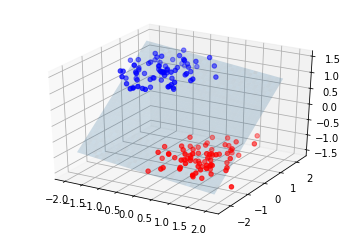

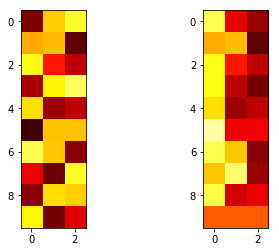

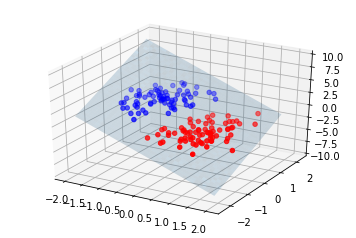

In [5]:
perceptron = Perceptron(X.shape[1])

# plot initial hyperplane onto data
fig3 = plt.figure()
ax31 = fig3.gca(projection='3d')
ax31.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y_hat, cmap='bwr')
zz_perceptron = -(np.dot(np.transpose(np.vstack([xx[None, :], yy[None, :]]), (1, 2, 0)), perceptron.weights[:-1]) + perceptron.bias) / perceptron.weights[-1]
ax32 = fig3.gca()
ax32.plot_surface(xx, yy, zz_perceptron, alpha=0.2)

perceptron.train(X, Y_hat)

# plot "heatmaps"
heatmaps = np.array(perceptron.heatmaps)
fig4, (ax41, ax42) = plt.subplots(1, 2)
ax41.imshow(heatmaps[:10, 0, :], cmap='hot', vmin=-2.0, vmax=2.0)
ax42.imshow(heatmaps[:10, 1, :], cmap='hot', vmin=-2.0*(perceptron.alpha*2.0), vmax=2.0*(perceptron.alpha*2.0))
plt.show()

# plot trained hyperplane onto data
fig5 = plt.figure()
ax51 = fig5.gca(projection='3d')
ax51.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y_hat, cmap='bwr')
zz_perceptron = -(np.dot(np.transpose(np.vstack([xx[None, :], yy[None, :]]), (1, 2, 0)), perceptron.weights[:-1]) + perceptron.bias) / perceptron.weights[-1]
ax52 = fig5.gca()
ax52.plot_surface(xx, yy, zz_perceptron, alpha=0.2)

plt.show()


Problem: the perceptron is constrained to use a step activation function, and is thus constrained to solve classifiction problems.

<a id=delta_rule></a>
### 1960: Delta rule
Idea: a [paper](http://www.dtic.mil/dtic/tr/fulltext/u2/241531.pdf) by Bernard Widrow and Tedd Hoff described a way to modify the perceptron algorithm showing that **the step activation function was not a necessary condition for Hebbian learning**.

<img src='figures/linear_unit.png', width=480, height=480>

The two key tools on which the Delta rule relies are the chain rule for a composed function $f(w) = f(\phi(w))$

$$\frac{\partial f}{\partial w} = \frac{\partial f}{\partial \phi} \frac{\partial \phi}{\partial w}$$

and the steepest descent numerical optimization method

$$\Delta w = -\alpha \nabla_w f$$

which allow to replace the error signal $\delta y^{(i)}$ in a suitable manner.
This is where the Delta rule algorithms takes its name.

The Widrow-Hoff neuron, called ADAptive LINE neuron or **Adaline**, differs from a LTU in that its output is computed withouth thresholding the internal neuron score.
This implies that the error signal $\delta y^{(i)}$ is not constrained to the set $\{-2, +2\}$, but can be proportional to the distance from the desired output $\delta y^{(i)} \propto (\hat{y}^{(i)} - y^{(i)})$.
This effect is obtained applying a Least Mean Squres (LMS) loss

$$L(x) = \frac{1}{2} (\hat{y} - y)^2$$

to the Adaline's output $Adaline(x) = y$.
This yields the update:

$$\begin{align} \Delta w_{ij} &= -\alpha \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial w_{ij}} \\ &= -\alpha (-(\hat{y}_j - y_j)) x_i \end{align}$$

An advantage of this model is that **it can handle also linear regression**: this depends on the fact that the desired response $\hat{y}$ can be whichever real number, and is not constrained to be a binary variable.


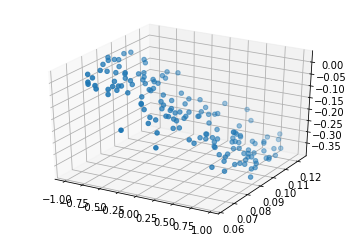

In [6]:
# noisy line dataset
def noisy_line(noise=0.01):
    n_samples = 150
    X = np.random.uniform(low=-1.0, high=1.0, size=(n_samples, 1))
    theta = np.random.uniform(low=-0.2, high=0.2, size=(2, 2))
    Y_hat = theta[0, :] + X * theta[1, :]
    Y_hat += noise * np.random.randn(n_samples, 1)
    return theta, X, Y_hat

theta, X, Y_hat = noisy_line()

# plot data
fig6 = plt.figure()
ax = fig6.gca(projection='3d')
ax.scatter(X, Y_hat[:, 0], Y_hat[:, 1])
plt.show()


In [7]:
class Adaline():
    def __init__(self, in_dim, out_dim, alpha=0.01, n_epochs=10):
        self.weights = 0.01 * np.random.randn(in_dim, out_dim)
        self.biases = np.zeros((1, out_dim))
        # training hyperparameters
        self.alpha = alpha
        self.n_epochs = n_epochs
        self.losses = list()
    
    def preprocess(self, x):
        if x.ndim == 1:
            x = x.reshape((x.shape[0], -1))
        return x
    
    def linear(self, x):
        return self.biases + np.dot(x, self.weights)
    
    def activate(self, linear):
        return linear
    
    def predict(self, x):
        x = self.preprocess(x)
        return self.activate(self.linear(x))
    
    def train_one_step(self, x, y_hat):
        y = self.predict(x)
        delta_y = y_hat - y
        loss = np.sum(np.square(delta_y)) / 2
        grad_y = -delta_y
        grad_w = x.T * grad_y
        grad_b = grad_y
        delta_w = -self.alpha * grad_w
        delta_b = -self.alpha * grad_b
        self.weights += delta_w
        self.biases += delta_b
        
    def train(self, X, Y_hat):
        for i_epoch in range(self.n_epochs):
            for (x, y_hat) in zip(X, Y_hat):
                self.train_one_step(x, y_hat)
            loss = self.loss(X, Y_hat)
            self.losses.append(loss)
            print('Epoch {:2d} - Loss: {:6.2f}'.format(i_epoch+1, loss))
            
    def loss(self, X, Y_hat):
        Y = self.predict(X)
        delta = Y_hat - Y
        loss = np.sum(np.square(delta)) / 2
        return loss
    

Epoch  1 - Loss:   0.55
Epoch  2 - Loss:   0.15
Epoch  3 - Loss:   0.06
Epoch  4 - Loss:   0.03
Epoch  5 - Loss:   0.02
Epoch  6 - Loss:   0.02
Epoch  7 - Loss:   0.01
Epoch  8 - Loss:   0.01
Epoch  9 - Loss:   0.01
Epoch 10 - Loss:   0.01


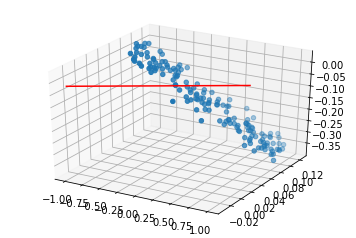

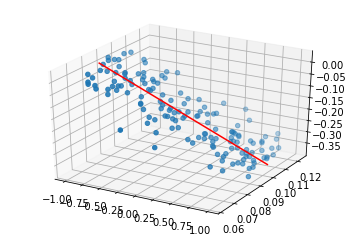

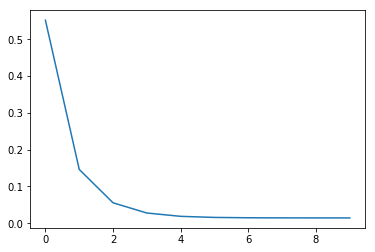

Bias (real):  [ 0.09368143 -0.18011539]
Bias (learnt):  [[ 0.09405503 -0.17976069]]
Weights (real):  [[ 0.00845692 -0.19319481]]
Weights (learnt) :  [[ 0.00943849 -0.19149544]]


In [8]:
adaline = Adaline(X.shape[1], Y_hat.shape[1])

# generate a mesh to compute Adaline predictions
x = np.linspace(-1.0, 1.0)

# plot untrained Adaline predictions onto data
fig7 = plt.figure()
ax71 = fig7.gca(projection='3d')
ax71.scatter(X, Y_hat[:, 0], Y_hat[:, 1])
y = adaline.predict(x)
ax72 = fig7.gca()
ax72.plot(x, y[:, 0], y[:, 1], c='r')

adaline.train(X, Y_hat)

# plot trained Adaline predictions onto data
fig8 = plt.figure()
ax81 = fig8.gca(projection='3d')
ax81.scatter(X, Y_hat[:, 0], Y_hat[:, 1])
y = adaline.predict(x)
ax82 = fig8.gca()
ax82.plot(x, y[:, 0], y[:, 1], c='r')
plt.show()

fig9 = plt.figure()
plt.plot(adaline.losses)
plt.show()

print('Bias (real): ', theta[0, :])
print('Bias (learnt): ', adaline.biases)
print('Weights (real): ', theta[1:, :])
print('Weights (learnt) : ', adaline.weights)


Problem: both the perceptron and Adaline are intrinsically uncapable of non-linear discrimination.

Consider the case of a circular dense blob of points surrounded by a circular crown of qualitatively different points.
As humans, we could easily discriminate them in an analytic way by a transformation from a Cartesian coordinate system to a polar one:

$$\begin{align} \rho &: \mathbb{R}^2 \to \mathbb{R} \\ &(x_1, x_2) \mapsto \rho = \sqrt{x_1^2 + x_2^2} \end{align}$$

The polar reference allows for a straightforward classification:

$$f((x_1, x_2)) = \begin{cases} +1 , & \mbox{if } \rho((x_1, x_2)) < \bar{\rho} \\ -1 , & \mbox{if } \rho((x_1, x_2)) \geq \bar{\rho} \end{cases}$$

where $\bar{\rho}$ is a suitable threshold.
The perceptron and Adaline have no hope to solve this problem.


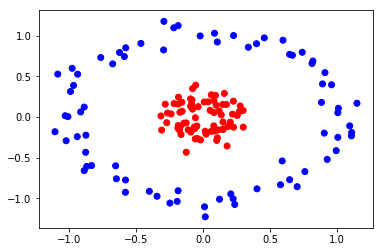

In [9]:
from sklearn.datasets import make_circles

# generate non-linearly separable data
X, Y_hat = make_circles(n_samples=150, noise=0.1, factor=0.2)

# plot non-linearly separable data
fig10 = plt.figure()
ax101 = fig10.gca()
ax101.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='bwr')
plt.show()


<a id=uat></a>
### 1989: Universal Approximation Theorem

Idea: George Cybenko proved a [critical result](http://web.eecs.umich.edu/~cscott/smlrg/approx_by_superposition.pdf) about multilayer neural networks with at least one hidden layer.
In particular, he found that **given an arbitrary continuous function $\phi$, a two-layers Artificial Neural Network with sigmoid activation functions and a sufficiently large amount of neurons in the hidden layer is capable of approximating $\phi$ arbitrarily close**.
A few years later, Hornik [generalized the result](http://zmjones.com/static/statistical-learning/hornik-nn-1991.pdf) to other classes of activation functions: sigmoid functions are not a necessary condition to learn non-linearities.


Problem: the missing link is an extension of the perceptron algorithm and the Delta rule to multilayer networks.

<a id=backprop></a>
### 1986: Backpropagation algorithm

Idea: David Rumelhart and Geoffrey Hinton [extended the Delta rule](https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf) to compute the inifinitesimal changes to be applied to an arbitrary network's parameters in order to reduce the error at its task.

This method can be used to efficiently train multilayer neural networks.
The possibility to train models with more than just one hidden layer enables the construction of **Deep Neural Networks** (DNN for short), Artificial Neural Networks that try to exploit the UAT not by adding more and more neurons to a single hidden layer, but instead **create a hierarchy of two or more transformations** to ease the process of extracting the desired mapping $f: X \to Y$.

To summarize:
* single-layer models are equivalent to statistical inference that does not use any intermediate feature map;
* two-layers models (i.e. models with just a single hidden layer, also called *shallow models*) are equivalent to statistical inference that uses just a single feature map;
* three-or-more-layers models (also called *deep models*) are equivalent to statistical inference that uses many intermediate feature maps.

As a conclusive note for this lesson, we will give analytical formulas for the backpropagation algorithm.
Suppose we have a $L$-feature maps model

$$f(x) = f(\phi_{L}(\phi_{L-1}((\dots \phi_1(x, w_{(1)})), w_{(L-1)}), w_{(L)})$$

To adjust the arbitrary $k$-th feature parameters, the backpropagation algorithm works in two steps.
The first is using the chain rule to compute the partial derivative of the model loss with respect to the parameters to be adjusted:

$$\frac{\partial L}{\partial w_{(k)}} = \frac{\partial L}{\partial f} \frac{\partial f}{\partial \phi_{L}} \left( \prod_{i=L}^{i=k+1}\frac{\partial \phi_{i}}{\partial \phi_{i-1}} \right) \frac{\partial \phi_{k}}{\partial w_{(k)}}$$

The second step consists in applying whichever numerical optimization algorithm the investigator estimates suitable for the problem; for example, using steepest gradient descent yields an update:

$$\Delta w_{(k)} = -\alpha \frac{\partial L}{\partial w_{(k)}}$$


### References

**History of single-layer ANNs**: this nice [blog post](http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html) by Sebastian Raschka provides additional examples and visualizations.

**Backpropagation**: I definitely suggest to read [Stanford's lesson](http://cs231n.github.io/optimization-2/) for an intuitive explanation (or watch its [Youtube version](https://www.youtube.com/watch?v=59Hbtz7XgjM) for the laziest) and Michael Nielsen's [online book](http://neuralnetworksanddeeplearning.com/) for a better mathematical understanding.
